<a href="https://www.kaggle.com/code/tomyanowitz/fitness-tracker-data-analysis?scriptVersionId=161183339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysis of fitness tracker data

1. [Data cleaning in Google Sheets](#CLEAN)
2. [Data Analysis in SQL (BigQuery) & Vizualisation in Tableau](#ANALYZE)<br>
    a. [Sleep](#SLEEP)<br>
    b. [Walking](#WALK)<br>
    c. [Weight](#WEIGHT)<br>
3. [Conclusion](#CONCLUSION)

# Introduction

Here are the questions I want to answer :
1. What are some trends in smart device usage?
2. How could these trends apply to the customers?
3. How could these trends help influence the marketing strategy?

The dataset consists of fitbit data from 30 users over a month during the year 2016.
This amounts to around 1000 user.days in theory, if every user was consistent with wearing their tracker.

The end goal is to the company grow by providing actionable insights to the marketing team.
One way to do this is by offering suggestions to the app's design team, to improve the user experience and help them switch to a healthier routine in response.
How :
1. get statistics about the sample users for a particular variable
2. research the consensus recommended level or range for that variable
3. compare the two
4. if they diverge, implement changes in the app

This information could be provided via the following means : informational notifications, reminders, goal setting, gamification (rewards and badges, maybe a social aspect), access to clear data vizualisation showing one's evolution towards a goal...

Circling back to the growth of the company : the more helpful users believe their tracker to be, the more the company will grow from word of mouth.

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

pd.options.display.max_rows = 50 # maximum number of rows to display

In [2]:
%reload_ext sql

%sql sqlite:////kaggle/input/fitbit-clean/fitbit_clean.db

<a id="CLEAN"></a>
# Data cleaning in Google Sheets
## <center>Dates
    
After failing to import the dataset in BigQuery, I decided to look at it in Google Sheets. Once in Sheets, I decided to do some data Cleaning there.

One thing that was apparent is that there was some issue with the dates and date-times in all the datasets.

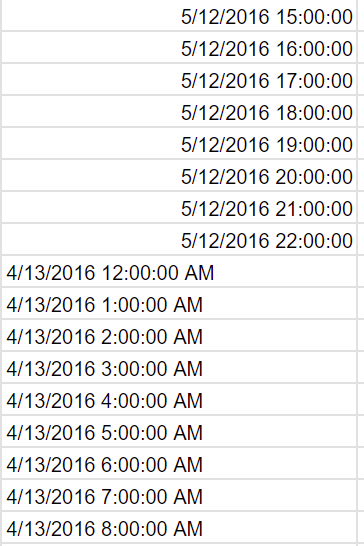

As you can see, the dates weren't all formatted in the same way. I could try and set the whole column to the same format, but it wouldn't work.<br>I noticed that whatever I did, the dates that are centered left (which means they're currently just text) wouldn't be formatted into Date and Time.<br> I finally realized what the problem was. Dates with days 1 to 12 were behaving as dates as excpeted, but days 13 and up wouldn't.<br>

My Google Sheets was looking for DD/MM/YYYY while the dataset was in MM/DD/YYYY, that explained why :
- Days 1 to 12 were registered inaccurate dates. For example 04/12 was considered December 4th instead of April 12th,<br>
- Days 13 to 31 were registered as text.<br>

No attempt at formatting the dates column worked.<br>
I then went through an overly complicated way to "clean" the dates in all the tables.<br>I knew this might be useless because that problem of formatting seemed to come from Google Sheets rather than the original csv files. Seeing no better option, I went and did the following :

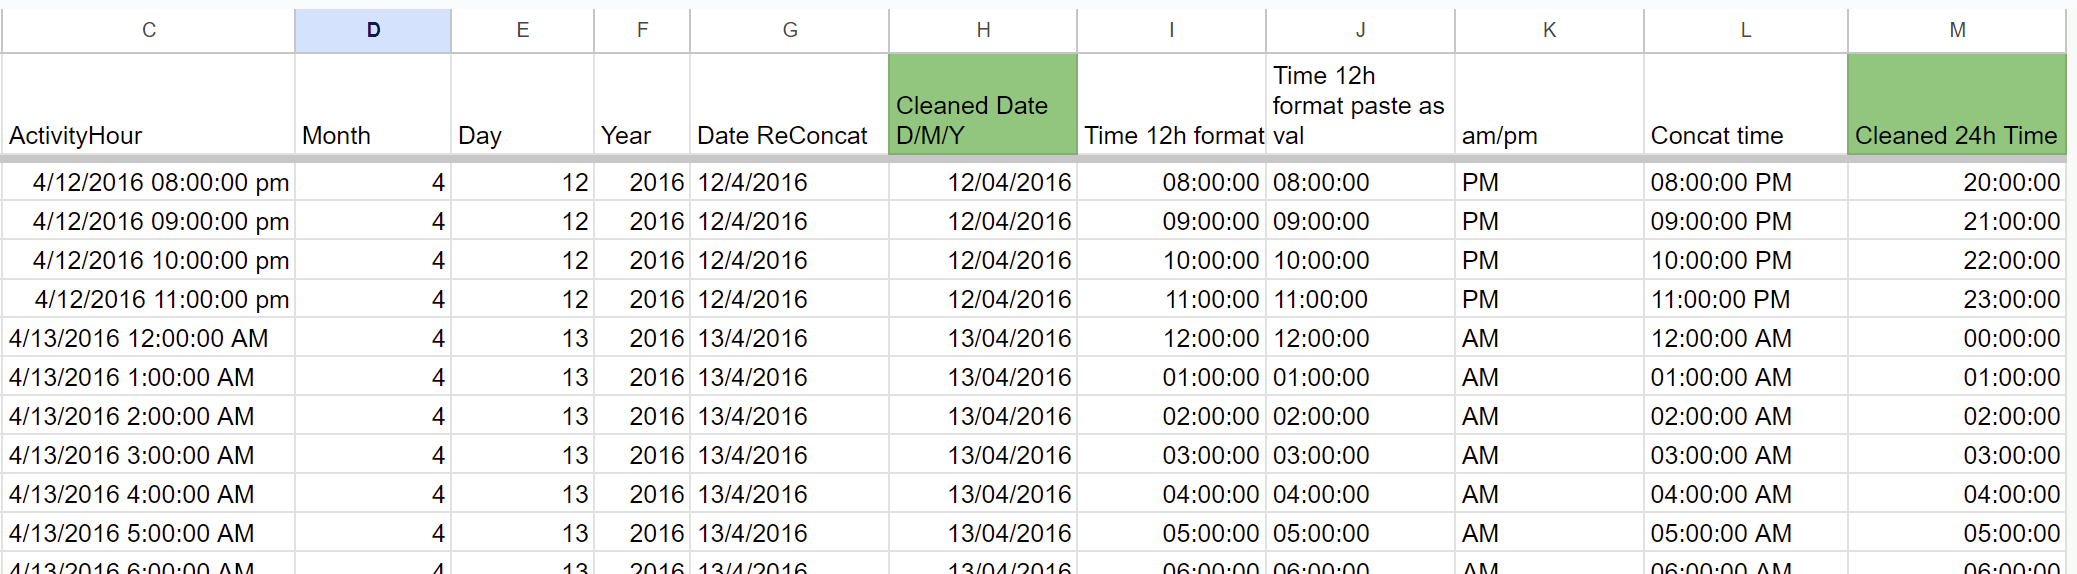

The cleaning steps were the following :
* Data > Split text to columns. Separator = space. This splits date from time.<br>

All the following only refers to the date.
* Data > Split text to columns. Separator = /
* I now have three columns : month, day, year
* I create a fourth column to recombine them in the only way my Google Sheets seems to understand : D/M/Y
* via the formula =CONCATENATE(day cell,"/",month cell,"/",year cell)
* Apply it to the whole column
* Copy and “Paste as values” this column into a new one
* Format it as a date in any format I wish, the dates are now accurate.
* Delete all the temporary columns

Cleaning the TIME data followed roughly the same steps, except for also having to deal with "AM" and "PM".

<!-- ![4 Final clean date and time.png](attachment:a176d895-ab52-4911-9f85-8dd8b6904120.png) -->

## Useless but useful
<br>
Only once I had done that for most of the tables did I figure out what the proper solution was.
I had to format the whole Sheet file:<br>
**File > Settings > General > Locale > Switch from France to United States.**

If I did this before importing the csv file, or if I formatted the date-time column once I did that, then the dates were all accurate and I didn't need to go through this needlessly complicated cleaning steps.<br>
It was a waste of time for this specific project, but a good use of my time to train on some date cleaning.

## Misc routine cleaning

Here is some additionnal cleaning steps I went through :
<br>Checking for
* Inconsistent data, for example out of range.
* Duplicates
* Empty cells

<a id="ANALYZE"></a>
# Data Analysis in SQL (BigQuery) & Vizualisation in Tableau

<a id="SLEEP"></a>
# SLEEP
## <center>Sleep duration
    
Please expand the vizualizations by collapsing the table of contents on the right.

In [3]:
%%HTML

<div class='tableauPlaceholder' id='viz1683124927419' style='position: relative'><noscript><a href='#'><img alt='Did the users get their recommended 7 to 9 hours of sleep per night ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;Howmuchsleep&#47;Sheet12&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Howmuchsleep&#47;Sheet12' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;Howmuchsleep&#47;Sheet12&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683124927419');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observation 1 : fitbit wearing
Only 40% of the total possible nights were tracked.

### Action
Informing users about the value and benefits of a more consistent use.
I think notifications on the app could be annoying and counter-productive. Instead, informing them through articles on the benefits of a consistent use might be better. The more they wear it, the more personalised the insights they'll receive on the app.

### Observation 2 : amount of sleep
Less than half of the tracked nights fall within the recommended of 7 to 9 hour range.
> We're using the total time actually asleep here. This is a metric you can only know with a tracker, because we do wakeup many times throughout the night without rembering it. For myself for example, I can be awake for a total of roughly an hour between (1st) falling asleep and (last) waking up.

- 44% of nights are under the minimum recommended 7 hours,
- while 9% were over the maximum recommended of 9 hours.

### Action
Find ways to help the user get into the recommended range consistenly.
Tackling too little is probably more important than too much. It’s both more common and more problematic.
> There is a lot of evidence when it comes to the health issues caused by both accute and chronic lack of quality sleep.
The upper limit of 9 hours isn't as clear. It's unlikely that it would cause problems, but it's more that, unless you're child or an athlete, getting that much sleep could be the symptom (not cause) of an underlying health issue.

Notification : instead of a notification “you should be fall asleep now”, I think it’d be more useful to have one at least 60 to 90 minutes prior that reminds us to start a wind-down routine :
* dim the lights, especially blue (*cold white*) ones : both in the room and on your screens
* stop eating
* try and stop screens early. If you're going to consume some type of content, favor the calming over the stimulating (avoid video games, news and social media)
* journaling, next day to-do (flushing what’s on our mind to prevent racing thoughts and worrying in bed)
* meditation

## <center>Insomnia

In [4]:
%%HTML
<div class='tableauPlaceholder' id='viz1683125125021' style='position: relative'><noscript><a href='#'><img alt='The fitbit users didn&#39;t have much trouble sleeping ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ti&#47;timeawake&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='timeawake&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ti&#47;timeawake&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683125125021');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='800px';vizElement.style.height='400px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
I used a comparison between time asleep and time in bed as an indiciator of trouble sleeping, the more advance stage being insomnia.
For the most part, the sample users during that month of tracking didn't seem to suffer from too much insomnia or more broadly trouble with falling asleep or staying asleep.

Note : This vizualisation doesn't distinguish between spending time awake before falling asleep, and walking up in the middle of the night.

### Action

That doesn’t mean we should ignore people that do.
If the app detects that a user consistently spends more that 20% of his time in bed awake, they could receive tips to reduce that number :
* stress management strategy
* wind down routine, avoiding overstimulation in the evening
* meditation
* tips regarding food, alcohol, caffeine…
* maybe even CBT
* limit alcohol and cannabis, especially in the evening
* stop caffeine intake earlier in the day
Very similar suggestions to the wind down routine.
> The half life of caffeine is around 6 hours. To avoid having caffeine interfering with sleep, there are individual differences in when people should stop. Some people should stop as early as noon, while some others can handle caffeine intake up to 4PM. Very few people can consume caffeine in the evening and have it not affect their sleep in any way. It naturally also depends on the dose.

## <center>Does bedtime influence sleep duration ?
In an age of sleep procrastition, I wanted to see if the hour at which people fall asleep correlates with how long they end up sleeping. No causation would be proven, but a valuable investigation nonetheless.
> Sleep procrastination refers to the behavior of delaying or putting off going to bed, or stopping any activity once in bed, even when you know that you should be sleeping. This can manifest in different ways, such as staying up late to watch TV, play video games, or scroll through social media, even when you know that you need to wake up early the next day. 

Now before I even did the analysis, I knew there was a big confounder that was absent from the dataset : the use an alarm clock.<br>
If your wake up time is fixed, then it is self evident that earlier sleeptime means a longer sleep. This dataset lets us observe if that's an issue with our sample users.<br>
But even more interesting would have been to have the presence of an alarm clock as a boolean (or a time) in our dataset, to filter the data and look at the association between bed time and sleep duration for people that do not use an alarm. This could have given us a small insight into circadian rhythms and biology.

In [5]:
%%sql --BIGQUERY SQL CODE, does not run with Sqlite

SELECT
  logid,
  min(date_time) as fell_asleep_date_time,
  max(date_time) as woke_up_date_time,
  DATETIME_DIFF(max(date_time), min(date_time), MINUTE) as sleep_duration,
  TIME(min(date_time)) as fell_asleep_time,
  TIME(max(date_time)) as woke_up_time

FROM (
  SELECT
    logid,
    CleanedDate,
    CleanedTime,
    CAST(CONCAT(CleanedDate, ' ', CleanedTime) AS DATETIME) AS date_time

  FROM fitbit_fitness_tracker_data.minuteSleep
)

GROUP BY logid
ORDER BY logid

 * sqlite:////kaggle/input/fitbit-clean/fitbit_clean.db
(sqlite3.OperationalError) no such table: fitbit_fitness_tracker_data.minuteSleep
[SQL: SELECT
  logid,
  min(date_time) as fell_asleep_date_time,
  max(date_time) as woke_up_date_time,
  DATETIME_DIFF(max(date_time), min(date_time), MINUTE) as sleep_duration,
  TIME(min(date_time)) as fell_asleep_time,
  TIME(max(date_time)) as woke_up_time

FROM (
  SELECT
    logid,
    CleanedDate,
    CleanedTime,
    CAST(CONCAT(CleanedDate, ' ', CleanedTime) AS DATETIME) AS date_time

  FROM fitbit_fitness_tracker_data.minuteSleep
)

GROUP BY logid
ORDER BY logid]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [6]:
fell_asleep_woke_up_times_results = pd.read_csv('/kaggle/input/fitbit-query-results/SQL Query results/fell_asleep_woke_up_times_results.csv')

fell_asleep_woke_up_times_results

,logid,fell_asleep_date_time,woke_up_date_time,sleep_duration,fell_asleep_time,woke_up_time
0,11372227280,2016-04-11T22:20:00,2016-04-12T06:03:00,463,22:20:00,06:03:00
1,11372414035,2016-04-11T21:56:00,2016-04-12T06:08:00,492,21:56:00,06:08:00
2,11372566564,2016-04-11T20:48:00,2016-04-12T05:53:00,545,20:48:00,05:53:00
3,11372617693,2016-04-12T00:23:30,2016-04-12T06:49:30,386,00:23:30,06:49:30
4,11373088895,2016-04-11T22:19:00,2016-04-12T04:14:00,355,22:19:00,04:14:00
...,...,...,...,...,...,...
454,11613774989,2016-05-11T21:49:30,2016-05-12T05:43:30,474,21:49:30,05:43:30
455,11614342249,2016-05-11T23:06:00,2016-05-12T08:00:00,534,23:06:00,08:00:00
456,11615068469,2016-05-11T22:42:00,2016-05-12T06:03:00,441,22:42:00,06:03:00
457,11615720066,2016-05-11T23:09:30,2016-05-12T06:45:30,456,23:09:30,06:45:30


Here is the resulting Tableau scatter plot. I filtered the data to only keep sleep duration over 180 minutes, with falling asleep time between 8pm and 6am, to remove the noise of naps or outlier data.
You can tweak the filters yourself on the right of the viz.

In [7]:
%%HTML

<div class='tableauPlaceholder' id='viz1683125080810' style='position: relative'><noscript><a href='#'><img alt='Earlier bedtime = more sleep ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ea&#47;Earlierbedtimemoresleep&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Earlierbedtimemoresleep&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ea&#47;Earlierbedtimemoresleep&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683125080810');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
As you can see, and as you might have guessed, the trend is clear. On average, falling asleep earlier means sleeping longer.<br>
One thing I could have done to supplement the scatter plot is a bar chart where I group the samples per hour they fell asleep, and plot the median sleep duration for each group.

### Action
This is perhaps an opportunity to offer some suggestions to help users sleep earlier rather than later, avoiding sleep procrastination.
1. When would you like to wake up ?
2. How much sleep do you think you would benefit from the most from ? Pick between 7 and 9 hours.
3. Fitbit data : how long do you usually take to fall asleep ?
4. Fitbit data : how much of your night is on average spent awake ?
5. Data points 2, 3 and 4 are combined into a go to bed time.
6. You can set a reminder before that time, you decide when (30, 60 or 90 minutes before bed time)

## <center>Does sleep influence calorie burning the next day ?

That's an other potential relationship I was wondering about.<br>
If you sleep long enough, do you burn more calories the next day ?<br>
Perhaps you're more likely to exercise (or simply walk more) when well rested ?

In [8]:
%%HTML
<div class='tableauPlaceholder' id='viz1683125181785' style='position: relative'><noscript><a href='#'><img alt='More sleep = more activity ? Not for this sample ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sl&#47;SleepandActivity&#47;Sheet22&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SleepandActivity&#47;Sheet22' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sl&#47;SleepandActivity&#47;Sheet22&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683125181785');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
This time, no apparent relationship between the two metrics was revealed.<br>
One thing to note here is that we can eliminated the existence of a relationship entirely.
There could be - though unlikely - two opposite forces at play canceling each other :
* You sleep more and have more energy and motivation to be active the next day
* You sleep less and therefore de facto spend more hours awake the next day. You spend more calories awaked than in bed.

> * Sleeping: 30 to 60 calories per hour
> * Sitting: 60 to 90
> * Standing : 72 to 90
> * Walking: 180 to 300

<a id="WALK"></a>
# Walking
## <center>Steps per hour : a week heatmap

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1683125258986' style='position: relative'><noscript><a href='#'><img alt='Average number of steps per hour ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book10_16824431874220&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book10_16824431874220&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book10_16824431874220&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683125258986');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Limitation
I thought the weekly heatmap was a good idea initially, but it turns out to be limited in the insights we can extract from it, more can be done.<br>
I decided to shift to only comparing three types of days : weekday, saturday, and sunday, and doing so via bar charts instead of a heatmap. That would make whatever differences might exist between them more apparent.

## <center>Steps per hour : comparing average week day, saturday and sunday

#### Making days start at 4AM

Query n°1 has the task of shifting the definition of a day. Instead of going from midnight to 11PM, I thought that, in the context of step counting, it made more sense to me to have days start at 4AM and finish at 3:59.<br>
Whoever walks between midnight and 3AM, is likely doing so before sleep, not after.<br>
For exemple : I want the steps registered between midnight and 3AM on Sunday to count towards the previous Saturday.<br>
To make the switch from SQL to a tableau vizualisation easier, I created a 24th, [25th](https://www.youtube.com/watch?v=r8f8K6TNtXI), 26th and 27th hour.<br>
April 15 hour 2 (2AM) would now be April 14 hour 26 ("14PM")

In [10]:
%%sql --BIGQUERY SQL CODE, does not run with Sqlite

WITH time_to_int as (
SELECT
*,
EXTRACT(HOUR FROM CleanedTime) as hour --We convert the time to an INT for easier manipulation later on
 FROM hourlySteps
)
 
SELECT
    Id,
    CASE --If a time falls between midnight and 3AM, we move it to the previous day.
        WHEN hour=0 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        WHEN hour=1 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        WHEN hour=2 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        WHEN hour=3 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        ELSE CleanedDate
    END as day_4am_to3am,
 
    CASE --If a time falls between midnight and 3AM, we add 24 to the time, effectively ending up with 24,25,26,27PM
        WHEN hour=0 THEN 24
        WHEN hour=1 THEN 25
        WHEN hour=2 THEN 26
        WHEN hour=3 THEN 27
        ELSE hour
-- as you can see both CASE statements have the same WHEN but SQL THEN doesn't support two statements (AND)
    END as time_4am_to3am,
    StepTotal
 
FROM time_to_int
 
ORDER BY Id, day_4am_to3am, time_4am_to3am

 * sqlite:////kaggle/input/fitbit-clean/fitbit_clean.db
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: WITH time_to_int as (
SELECT
*,
EXTRACT(HOUR FROM CleanedTime) as hour --We convert the time to an INT for easier manipulation later on
 FROM hourlySteps
)
 
SELECT
    Id,
    CASE --If a time falls between midnight and 3AM, we move it to the previous day.
        WHEN hour=0 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        WHEN hour=1 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        WHEN hour=2 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        WHEN hour=3 THEN DATE_ADD(CleanedDate, INTERVAL -1 DAY)
        ELSE CleanedDate
    END as day_4am_to3am,
 
    CASE --If a time falls between midnight and 3AM, we add 24 to the time, effectively ending up with 24,25,26,27PM
        WHEN hour=0 THEN 24
        WHEN hour=1 THEN 25
        WHEN hour=2 THEN 26
        WHEN hour=3 THEN 27
        ELSE hour
-- as you can see both CASE statements have the same WHEN but SQL THEN 

In [11]:
hourlySteps_4am_to_3am = pd.read_csv('/kaggle/input/fitbit-query-results/SQL Query results/hourlySteps_4am_to_3am.csv')
hourlySteps_4am_to_3am

,Id,day_4am_to3am,time_4am_to3am,StepTotal
0,1503960366,2016-04-11,24,373
1,1503960366,2016-04-11,25,160
2,1503960366,2016-04-11,26,151
3,1503960366,2016-04-11,27,0
4,1503960366,2016-04-12,4,0
...,...,...,...,...
22094,8877689391,2016-05-12,10,514
22095,8877689391,2016-05-12,11,1407
22096,8877689391,2016-05-12,12,3135
22097,8877689391,2016-05-12,13,307


The second query groups all days across the sample month (and 30+ users) in three bins : weekday, saturday, sunday. We then compute the average number of steps for each hour of the day.

In [12]:
%%sql --BIGQUERY SQL CODE, does not run with Sqlite

-- Here we're getting the number of entries for each hour of the week.
-- For example, how many data points we have for Wednesday at 4PM (16:00)

SELECT --QUERY n°3 : counts how many entries we have for each day of the week+time.
  --The data spans roughly 33 users over 4 weeks so we end up with numbers between 100 and 150.
  --Not every user wore its fitbit every hour of the week so that number fluctuates
    CASE
    WHEN nb_day_of_the_week < 6 THEN "weekday"
    WHEN nb_day_of_the_week = 6 THEN "saturday"
    WHEN nb_day_of_the_week = 7 THEN "sunday"
  END AS day,

  time_4am_to3am,
  CAST(ROUND (SUM(StepTotal)/COUNT(Id)) as INT64) as avg_nb_steps
FROM (
  SELECT
    --QUERY n°2 : creates a column that merges the day of the week with the time of the day
    -- example : 2_17:00:00 for Tuesday at 5PM
    nb_day_of_the_week,
    time_4am_to3am,
    Id,
    StepTotal
  FROM ( 
    SELECT --QUERY n°1 : assigns a day of the week to each day (monday = 1, tuesday =2..., sunday = 7)
    --The following IF clause just rearranges the default DAYOFWEEK so that the first day is monday, not sunday
    IF(EXTRACT(DAYOFWEEK FROM day_4am_to3am) = 1, 7, EXTRACT(DAYOFWEEK FROM day_4am_to3am)-1
      ) AS nb_day_of_the_week,
    time_4am_to3am,
    Id,
    StepTotal

    FROM fitbit_fitness_tracker_data.hourlySteps_4am_to_3am
  ) AS temp
)
  
GROUP BY day, time_4am_to3am
ORDER BY day, time_4am_to3am

--We end up as expected with 168 rows, the number of hours in a week

 * sqlite:////kaggle/input/fitbit-clean/fitbit_clean.db
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: -- Here we're getting the number of entries for each hour of the week.
-- For example, how many data points we have for Wednesday at 4PM (16:00)

SELECT --QUERY n°3 : counts how many entries we have for each day of the week+time.
  --The data spans roughly 33 users over 4 weeks so we end up with numbers between 100 and 150.
  --Not every user wore its fitbit every hour of the week so that number fluctuates
    CASE
    WHEN nb_day_of_the_week < 6 THEN "weekday"
    WHEN nb_day_of_the_week = 6 THEN "saturday"
    WHEN nb_day_of_the_week = 7 THEN "sunday"
  END AS day,

  time_4am_to3am,
  CAST(ROUND (SUM(StepTotal)/COUNT(Id)) as INT64) as avg_nb_steps
FROM (
  SELECT
    --QUERY n°2 : creates a column that merges the day of the week with the time of the day
    -- example : 2_17:00:00 for Tuesday at 5PM
    nb_day_of_the_week,
    time_4am_to3am,
    Id,
    StepTotal
  FRO

Here is the result after some work in Tableau (see full version by clicking on the Tableau icon in the bottom left of the viz)

In [13]:
%%HTML

<div class='tableauPlaceholder' id='viz1705919755960' style='position: relative'><noscript><a href='#'><img alt='How much do people walk at different times of the day ? Each day starts at 4am and ends at 3am ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;Howmuchdopeoplewalkatdifferenttimesoftheday&#47;StepsPerHour&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Howmuchdopeoplewalkatdifferenttimesoftheday&#47;StepsPerHour' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;Howmuchdopeoplewalkatdifferenttimesoftheday&#47;StepsPerHour&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1705919755960');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
Users walked the most on saturdays (8378 steps on average), then on weekdays (7759) and the least on sundays (6796).<br>
The number of steps peaks at 6PM on weekdays, and at 1PM on Saturdays. There isn't any clear peak on sundays.

### Action
On none of the days did the average user reach the recommended 10.000 steps, for basic cardiovascular fitness and calorie burning.<br>
The average user would need to increase his walking by +30% to reach a goal 10.000 steps a day.<br>
This is an avergage of all the users, so it's likely some users do reach that goal. But the notifications would be tailored for each user depending on their personnal data so we don't need to worry about over-generalizing.

Maybe the Bellabeat tracker or app can remind the user of some steps goal at strategic moments of the day (ie not at 11PM). They could also receive badges and have access streak counter : how many days in a row have they reached their daily steps goal.

# Weight logging

The Fitbit app allows users to log their weight.

In [14]:
%%HTML
<div class='tableauPlaceholder' id='viz1683125291329' style='position: relative'><noscript><a href='#'><img alt='8 of the 33 fitbit users have logged their weight at least once ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fi&#47;Fitbitweight&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Fitbitweight&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fi&#47;Fitbitweight&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683125291329');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Observations
Overall, weight logging was mostly ignored by the users.<br>
Out of 33 users, only 8 logged their weight at least once, and only 2 did so consistently.
Contraty to sleep, steps, or calories tracking, this has to be done manually by the users, and the tracker isn't being used, hence the lower amount of data.<br>
Another reason might be that it's not obvious if or how logging ones weight can prove benefitial.

### Action

Bellabeat can think of the value of that feature. Do we believe it can be useful to some users ? If so, how can we encourage consistent logging ?
Maybe we can only notify some users, and not others. For example maybe users can choose between a couple of goals :
* gaining lean mass (calorie surplus)
* losing fat (calorie deficit)
* weight maintenance

>*The issue with weight on the scale is that it is the sum of two very interesting numbers : lean mass and fat mass. But the scale just gives us the sum. The scales that do offer information regarding bodyfat aren't particularly accurate, and BMI is close to useless at the individual level.<br>For two individuals of the same sex and height, sharing the exact same weight on the scale (and therefore BMI) can hide wide differences in bodycomposition and health. One could be high in lean mass and low in bodyfat, while the opposite would be true for the other person.*

For the users that do want to track their weight, some added features can be offered. For example, weight on the scale evolution day to day  is actually a pretty noisy piece of data : the scales have a margin of error, and our water weight fluctuates a lot too.
Therefore, displaying and tracking weekly average weight can be more valuable. This means the user should weigh themselves 4 to 7 times a week, at the same time of the day, maybe while fasted before breakfast, and not worry too much about the day to day fluctuations.

<a id="CONCLUSION"></a>
# Conclusion

We took a dataset from fitbit fitness trackers that included data from 30 users across 30 days.
We explores data regarding both how they used their fitbit (wearing consistency, manual loggicing), and what the tracker data revealed about their routine.
We then suggested things Bellabeat could work on to improve the overall user experience of the Bellabeat trackers, with the focus on the following : **how do we help a user set sensible health goals, and reach them successfully ?**<br><br>
It's reasonable to assume that someone who buys a fitness tracker do so with a couple of goals in mind :
* assessing where they currently stand, relying on hard data rather than intuition and rough guesses
* set a goal
* tweak their daily habits in the pursuit of that goal

The advantage of a fitness app linked to a tracker is that the suggestions and notifications can be tailored to the user's current habits, and therefore be more useful and actionable than general guidelines one might read in a book.